# Exploring Football Transfers in Europe 2009-2017
###### by David VanHeeswijk

In [236]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%matplotlib inline

In [237]:
df = pd.read_csv('transfer_data.csv')

df.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER       6236 non-null   object 
 1   WINDOW       6236 non-null   object 
 2   POSITION     5109 non-null   object 
 3   COUNTRY      5411 non-null   object 
 4   FROM         6235 non-null   object 
 5   TO           6236 non-null   object 
 6   DESCRIPTION  6236 non-null   object 
 7   PRICE        6236 non-null   float64
 8   LEAGUE       6236 non-null   object 
 9   SEASON       6236 non-null   object 
dtypes: float64(1), object(9)
memory usage: 487.4+ KB


In [239]:
df['LEAGUE'].unique()

array(['EPL', 'La Liga', 'Serie A', 'ROE', 'Bundesliga', 'MLS', nan],
      dtype=object)

In [240]:
df.dropna(inplace=True)

In [241]:
df_epl = df[df['LEAGUE']=='EPL']
df_epl.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
6,Kevin De Bruyne,Pre-Season,Midfielder,Belgium,Wolfsburg,Manchester City,Sold,76000000.0,EPL,15/16
7,Angel Di Maria,Pre-Season,Midfielder,Argentina,Real Madrid,Manchester United,Sold,75000000.0,EPL,14/15
8,Raheem Sterling,Pre-Season,Midfielder,England,Liverpool,Manchester City,Sold,69400000.0,EPL,15/16
16,John Stones,Pre-Season,Defender,England,Everton,Manchester City,Sold,55500000.0,EPL,16/17


In [242]:
df_epl.groupby('SEASON')['PRICE'].sum()

SEASON
09/10    2.395000e+07
10/11    2.944150e+08
11/12    4.222800e+08
12/13    5.298300e+08
13/14    6.547500e+08
14/15    9.251000e+08
15/16    1.079575e+09
16/17    1.275700e+09
Name: PRICE, dtype: float64

In [243]:
df_laliga = df[df['LEAGUE']=='La Liga']
df_laliga.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
5,James Rodriguez,Pre-Season,Midfielder,Colombia,Monaco,Real Madrid,Sold,80000000.0,La Liga,14/15
15,Neymar,Pre-Season,Attacker,Brazil,Santos,Barcelona,Sold,57000000.0,La Liga,13/14
18,Andre Gomes,Pre-Season,Midfielder,Portugal,Valencia,Barcelona,Sold,50000000.0,La Liga,16/17


In [244]:
df_laliga.groupby('SEASON')['PRICE'].sum()

SEASON
09/10     15000000.0
10/11    231090000.0
11/12    301550000.0
12/13    107750000.0
13/14    347100000.0
14/15    500200000.0
15/16    465900000.0
16/17    447200000.0
Name: PRICE, dtype: float64

In [245]:
df_laliga = df_laliga[(df_laliga['SEASON']!= '07/08') & (df_laliga['SEASON']!= '08/09')]
df_laliga.sort_values('SEASON').head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
4381,Eliseu,Mid-Season,Midfielder,Portugal,Lazio,Real Zaragoza,Loan,0.0,La Liga,09/10
4380,Asier Del Horno,Mid-Season,Defender,Spain,Valencia,Real Valladolid,Loan,0.0,La Liga,09/10
4382,Humberto Suazo,Mid-Season,Attacker,Chile,Monterrey,Real Zaragoza,Loan,0.0,La Liga,09/10
4383,Marius Stankevičius,Mid-Season,Defender,Lithuania,Sampdoria,Sevilla,Loan,0.0,La Liga,09/10
4384,Marius Stankevicius,Mid-Season,Defender,Lithuania,Sampdoria,Sevilla,Loan,0.0,La Liga,09/10


In [246]:
df_seriea = df[df['LEAGUE']=='Serie A']
df_seriea = df_seriea[(df_seriea['SEASON']!= '07/08') & (df_seriea['SEASON']!= '08/09')]
df_seriea.sort_values('SEASON').head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
5767,Alexandros Tziolis,Mid-Season,Midfielder,Greece,Panathinaikos,Siena,Undisclosed,0.0,Serie A,09/10
3971,Marco Storari,Mid-Season,Goalkeeper,Italy,AC Milan,Sampdoria,Loan,0.0,Serie A,09/10
3970,Luca Toni,Mid-Season,Attacker,Italy,Bayern Munich,Roma,Loan,0.0,Serie A,09/10
3952,Sebastian Eguren,Mid-Season,Midfielder,Uruguay,Villarreal,Lazio,Loan,0.0,Serie A,09/10
3951,Sergio Floccari,Mid-Season,Attacker,Italy,Genoa,Lazio,Loan,0.0,Serie A,09/10


In [247]:
df_bund = df[df['LEAGUE']=='Bundesliga']
df_bund.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
40,Javi Martinez,Pre-Season,Midfielder,Spain,Athletic Bilbao,Bayern Munich,Sold,40000000.0,Bundesliga,12/13
52,Mats Hummels,Pre-Season,Defender,Germany,Bor. Dortmund,Bayern Munich,Sold,38000000.0,Bundesliga,16/17
54,Arturo Vidal,Pre-Season,Midfielder,Chile,Juventus,Bayern Munich,Sold,37000000.0,Bundesliga,15/16
55,Mario Gotze,Pre-Season,Midfielder,Germany,Bor. Dortmund,Bayern Munich,Sold,37000000.0,Bundesliga,13/14
66,Julian Draxler,Pre-Season,Midfielder,Germany,Schalke,Wolfsburg,Sold,35000000.0,Bundesliga,15/16


In [248]:
df_roe = df[df['LEAGUE']=='ROE']
df_roe.sort_values('SEASON').head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
5213,Sandro Wagner,Mid-Season,Attacker,Germany,Duisburg,Werder Bremen,Undisclosed,0.0,ROE,09/10
1749,Philip Haglund,Mid-Season,Midfielder,Sweden,Brommapojkarna,Heerenveen,Sold,1000000.0,ROE,09/10
1867,Juan Gonzalo Lorca,Mid-Season,Attacker,Chile,Colo Colo,Boulogne,Sold,400000.0,ROE,09/10
3280,Freddy Adu,Mid-Season,Attacker,USA,Benfica,Aris Salonika,Loan,0.0,ROE,09/10
1565,Jos Hooiveld,Mid-Season,Defender,Netherlands,AIK,Glasgow Celtic,Sold,2000000.0,ROE,09/10


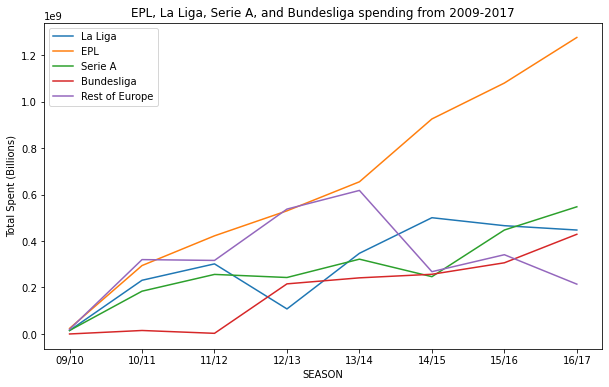

In [249]:
df_laliga.groupby('SEASON')['PRICE'].sum().plot(figsize=(10,6))
df_epl.groupby('SEASON')['PRICE'].sum().plot()
df_seriea.groupby('SEASON')['PRICE'].sum().plot()
df_bund.groupby('SEASON')['PRICE'].sum().plot()
df_roe.groupby('SEASON')['PRICE'].sum().plot()

plt.title('EPL, La Liga, Serie A, and Bundesliga spending from 2009-2017')
plt.ylabel('Total Spent (Billions)')
plt.legend(['La Liga', 'EPL','Serie A', 'Bundesliga','Rest of Europe'])


plt.show()

In [250]:
df_top_count = df.groupby('COUNTRY').count().reset_index()
df_top_count[['COUNTRY','PLAYER','PRICE']].sort_values('PLAYER', ascending=False).head(10)


,COUNTRY,PLAYER,PRICE
71,Italy,524,524
119,Spain,502,502
46,France,379,379
14,Brazil,320,320
5,Argentina,300,300
40,England,267,267
52,Germany,201,201
91,Netherlands,168,168
105,Portugal,155,155
134,United States,144,144


Now, dropping all players related to the MLS to create a Europe dataframe.

In [251]:
df_europe = df[df['LEAGUE']!='MLS']
df_europe['LEAGUE'].unique()

array(['EPL', 'La Liga', 'Serie A', 'ROE', 'Bundesliga'], dtype=object)

In [252]:
df_europe_count = df_europe.groupby('COUNTRY').count().reset_index()
df_europe_count = df_europe_count[['COUNTRY','PLAYER']].sort_values('COUNTRY')
df_europe_count.tail()

,COUNTRY,PLAYER
122,Uruguay,94
123,Venezuela,16
124,Wales,15
125,Zambia,5
126,Zimbabwe,1


In [253]:
df_europe_price = df_europe.groupby('COUNTRY')['PRICE'].sum().reset_index()
df_europe_price = df_europe_price.sort_values('COUNTRY')

In [254]:
df_europe_clean = df_europe_count.merge(df_europe_price,on='COUNTRY',how='outer',)
top_ten = df_europe_clean.sort_values('PRICE',ascending=False).head(10)
top_ten.columns = ['Country','Player_Count','Total_Value']
top_ten

,Country,Player_Count,Total_Value
111,Spain,497,1.486715e+09
14,Brazil,304,1.340200e+09
45,France,372,1.322030e+09
5,Argentina,282,1.126850e+09
50,Germany,200,8.225750e+08
64,Italy,518,8.003000e+08
39,England,253,7.955750e+08
11,Belgium,81,6.202500e+08
83,Netherlands,162,5.541000e+08
97,Portugal,151,4.664800e+08


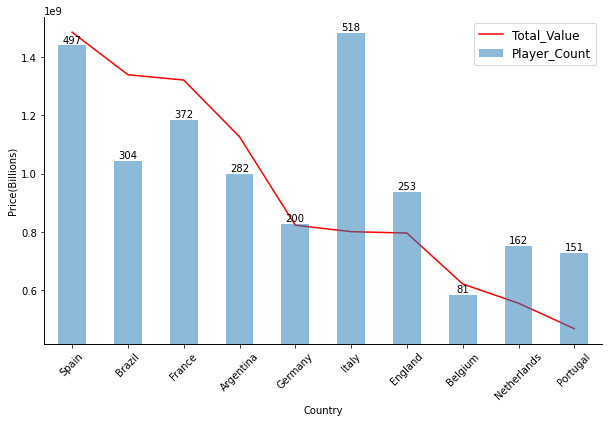

In [281]:
ax1 = top_ten.plot(x='Country',y='Total_Value',kind='line', color='red',figsize=(20,10))
plt.ylabel('Price(Billions)')
ax2 = top_ten.plot(x='Country',y='Player_Count',kind="bar",ax=ax1, secondary_y=True,alpha=0.5, rot=45, figsize=(10,6))

for row, t in enumerate(top_ten['Player_Count']):
    ax2.text(row, t+18, str(t), ha="center", va="top")

xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper right", prop={"size": 12})

for ax in (ax1,ax2):
    for loc in ("top", "right"):
        ax.spines[loc].set_visible(False)
        ax.tick_params(right=False, labelright = False)
        
    
plt.show()

In [284]:
top_ten['Average_Player_Price'] = top_ten['Total_Value']//top_ten['Player_Count']
top_ten.sort_values('Average_Player_Price')

,Country,Player_Count,Total_Value,Average_Player_Price
64,Italy,518,8.003000e+08,1544980.0
111,Spain,497,1.486715e+09,2991378.0
97,Portugal,151,4.664800e+08,3089271.0
39,England,253,7.955750e+08,3144565.0
83,Netherlands,162,5.541000e+08,3420370.0
45,France,372,1.322030e+09,3553844.0
5,Argentina,282,1.126850e+09,3995921.0
50,Germany,200,8.225750e+08,4112875.0
14,Brazil,304,1.340200e+09,4408552.0
11,Belgium,81,6.202500e+08,7657407.0


In [285]:
df[df['COUNTRY']=='Belgium']

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
6,Kevin De Bruyne,Pre-Season,Midfielder,Belgium,Wolfsburg,Manchester City,Sold,76000000.0,EPL,15/16
22,Christian Benteke,Pre-Season,Attacker,Belgium,Aston Villa,Liverpool,Sold,46500000.0,EPL,15/16
38,Axel Witsel,Pre-Season,Midfielder,Belgium,Benfica,Zenit,Sold,40000000.0,ROE,12/13
46,Michy Batshuayi,Pre-Season,Attacker,Belgium,Marseille,Chelsea,Sold,40000000.0,EPL,16/17
49,Eden Hazard,Pre-Season,Attacker,Belgium,Lille,Chelsea,Sold,40000000.0,EPL,12/13
...,...,...,...,...,...,...,...,...,...,...
6077,Thorgan Hazard,Pre-Season,Midfielder,Belgium,Lens,Chelsea,Undisclosed,0.0,EPL,12/13
6098,Jan Vertonghen,Pre-Season,Defender,Belgium,Ajax,Tottenham,Undisclosed,0.0,EPL,12/13
6177,Florent Cuvelier,Pre-Season,Midfielder,Belgium,Portsmouth,Stoke City,Undisclosed,0.0,EPL,10/11
6181,Simon Mignolet,Pre-Season,Goalkeeper,Belgium,Sint-Truidense,Sunderland,Undisclosed,0.0,EPL,10/11


In [286]:
df['DESCRIPTION'].unique()

array(['Sold', 'Co-ownership', 'Dispersal Draft', 'Expansion Draft',
       'Free', 'Homegrown', 'Loan', 'Re-entry Draft', 'SuperDraft',
       'Player Swap', 'Undisclosed', 'Waiver Draft'], dtype=object)

In [294]:
europe_free = df_europe[df_europe['DESCRIPTION']=='Free']
europe_free.groupby('TO')['TO'].count().sort_values(ascending=False)

TO
Levante          20
AC Milan         17
Malaga           16
West Bromwich    15
Sunderland       15
                 ..
Rapid Vienna      1
Real Mallorca     1
Braunschweig      1
Braga             1
Paris S-G         1
Name: TO, Length: 197, dtype: int64